In [10]:

!pip install biopython


from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt


from google.colab import files
import zipfile
import os

uploaded = files.upload()

Saving 2023ncbi_dataset (3).zip to 2023ncbi_dataset (3).zip


In [11]:
zip_file = "2023ncbi_dataset (3).zip"
extract_dir = "ncbi_dataset_2023"


with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

for root, dirs, files in os.walk(extract_dir):
    print(f"Files in '{root}': {files}")

Files in 'ncbi_dataset_2023': ['md5sum.txt', 'README.md']
Files in 'ncbi_dataset_2023/ncbi_dataset': []
Files in 'ncbi_dataset_2023/ncbi_dataset/data': ['assembly_data_report.jsonl', 'dataset_catalog.json', 'data_summary.tsv']
Files in 'ncbi_dataset_2023/ncbi_dataset/data/GCA_039050005.1': ['genomic.gbff']
Files in 'ncbi_dataset_2023/ncbi_dataset/data/GCA_039338855.1': ['genomic.gbff']


Saving 2023ncbi_dataset (3).zip to 2023ncbi_dataset (3) (4).zip
NA Gene Found: neuraminidase
Sequence Length: 1410

Codon Usage:
ATG: 9
AAT: 23
CCA: 8
CAA: 9
AGG: 6
ATA: 16
ACC: 7
ACT: 13
GGA: 10
TCA: 12
ATC: 12
TGT: 8
GTA: 10
ATT: 11
GGG: 18
GTC: 4
AGC: 10
TTG: 9
CTG: 7
AAC: 13
TGG: 15
GTT: 11
CAT: 4
ACA: 7
TAT: 9
CAG: 6
CCT: 6
GAA: 8
TGC: 11
GCC: 3
GAG: 13
ACG: 3
TTT: 11
CTT: 2
GCT: 10
TCG: 2
TTA: 2
GCG: 3
GGC: 7
TCT: 9
AGT: 14
TAC: 7
AAG: 9
GAC: 11
GGT: 9
AGA: 9
TCC: 7
GAT: 9
GTG: 5
CCG: 4
TTC: 7
CAC: 3
AAA: 8
CCC: 5
GCA: 3
CGG: 1
CGC: 1
TAG: 1


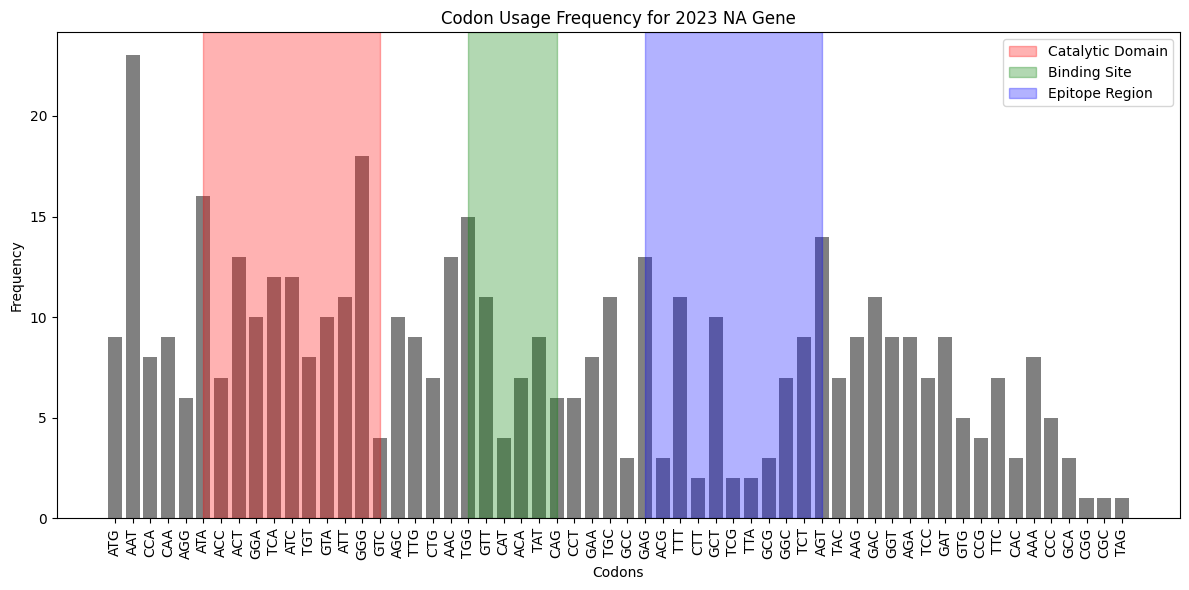

In [35]:
!pip install biopython

from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
import os

uploaded = files.upload()
with zipfile.ZipFile("2023ncbi_dataset (3).zip", "r") as zip_ref:
    zip_ref.extractall("ncbi_dataset_2023")

gbff_file = "ncbi_dataset_2023/ncbi_dataset/data/GCA_039338855.1/genomic.gbff"

na_sequence = None
for record in SeqIO.parse(gbff_file, "genbank"):
    for feature in record.features:
        if feature.type == "CDS" and "neuraminidase" in feature.qualifiers.get("product", [""])[0]:
            na_sequence = feature.location.extract(record).seq
            print(f"NA Gene Found: {feature.qualifiers['product'][0]}")
            print(f"Sequence Length: {len(na_sequence)}")
            break

if na_sequence:
    codons = [str(na_sequence[i:i + 3]) for i in range(0, len(na_sequence), 3) if len(na_sequence[i:i + 3]) == 3]
    codon_usage = Counter(codons)
    print("\nCodon Usage:")
    for codon, count in codon_usage.items():
        print(f"{codon}: {count}")

    annotations = {
        "Catalytic Domain": {"range": [5, 15], "color": "red"},
        "Binding Site": {"range": [20, 25], "color": "green"},
        "Epitope Region": {"range": [30, 40], "color": "blue"}
    }


    codon_list = list(codon_usage.keys())
    frequencies = list(codon_usage.values())

    plt.figure(figsize=(12, 6))
    plt.bar(codon_list, frequencies, color="gray")
    for feature, details in annotations.items():
        start, end = details["range"]
        plt.axvspan(start, end, color=details["color"], alpha=0.3, label=feature)

    plt.xlabel("Codons")
    plt.ylabel("Frequency")
    plt.title("Codon Usage Frequency for 2023 NA Gene")
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

mutations = {100: "synonymous", 200: "non-synonymous", 250: "non-synonymous", 400: "synonymous", 450: "non-synonymous"}
functional_regions = {"Catalytic Domain": [50, 150], "Binding Site": [200, 300], "Epitope Region": [350, 450]}

dn_ds_values = []
for region, (start, end) in functional_regions.items():
    dn = sum(1 for pos, typ in mutations.items() if start <= pos <= end and typ == "non-synonymous")
    ds = sum(1 for pos, typ in mutations.items() if start <= pos <= end and typ == "synonymous")
    dn_ds_values.append(dn / (ds + 1e-5))

capped_dn_ds_values = [min(value, 10) for value in dn_ds_values]




In [15]:
!pip install biopython

# MAFFT for sequence alignment
!apt-get install -y mafft

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato libauthen-sasl-perl libclone-perl libdata-dump-perl libencode-locale-perl
  libfile-listing-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl libnet-http-perl
  libnet-smtp-ssl-perl libnet-ssleay-perl libruby3.0 libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl lynx lynx-common mailcap mime-support netbase perl-openssl-defaults rake
  ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration
Suggested packages:
  libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libsub-name-perl libbusiness-isbn-

In [17]:
from Bio.Align import PairwiseAligner
aligner = PairwiseAligner()
aligner.mode = "global"


alignment = aligner.align(seq_2022, seq_2023)


best_alignment = alignment[0]
print(best_alignment)
print(f"Alignment score: {best_alignment.score}")



seq_2022 = "ATGAATCCAAATCAAAGGATAATAACCACTGGATCAATCTGTATGGTAATTGGGATAGTCAGCTTGATGCTGCAAATTGGGAACATAATCTCAATATGGGTTAGCCATTCAATCCAAACAGGGAATCAATATCAGCCTGAACCATGCAATCAAAGCATCATTGCCTATGAGAACAACACCTGGATAAATCAGACGTATGTCAACATCAACAATACCAATTTTCTTGCTGAGCAGGCTGTTACTTCGGTAACATTAGCGGGCAATTCATCTCTTTGCCCTATTAGTGGGTGGGCTATATACAGTAAGGACAACGGTATAAGAATTGGGTCCAAGGGGGATGTGTTTGTTATAAGGGAACCGTTCATCTCATGCTCCCACTTGGAATGCAGAACCTTTTTTCTGACCCAGGGAGCTCTGCTGAATGACAAACATTCTAATGGGACCGTTAAGGATAGAAGCCCCTATAGAACTTTGATGAGTTGTCCCGTGGGTGAGGCTCCTTCCCCGTACAATTCAAGGTTTGAGTCTGTTGCTTGGTCGGCAAGTGCTTGTCATGATGGCATCAGTTGGTTGACAATCGGTATTTCTGGTCCAGACAATGGAGCTGTGGCTGTATTGAAGTACAATGGCATAATAACGGATACTATCAAGAGTTGGAGAAACAACATTTTGAGAACTCAAGAATCTGAATGTGCGTGCGTAAATGGCTCTTGCTTCACTGTAATGACTGATGGACCAAGCAATGGGCAGGCCTCATATAAAATCTTCAAGATAGAGAAAGGGAAAGTAGTCAAATCAGTTGAATTGAATGCCCCTAATTACCACTACGAGGAATGCTCCTGTTACCCTGATGCGGGTGAGATTATGTGTGTGTGCAGGGACAATTGGCATGGCTCAAACCGGCCGTGGGTATCTTTTAATCAAAATCTGGAGTATCAAATAGGATATATATGCAGTGGGGTTTTCGGAGACAACCCCCGCCCCAATGATGGAACAGGCAGTTGCAGTCCAATGTCCTCTAACGGGGCATATGGGGTAAAAGGGTTTTCATTTAAGTACGGTAACGGGGTTTGGATCGGAAGAACAAAAAGCACTAGTTCCAGAAGCGGCTTTGAGATGATTTGGGATCCGAATGGGTGGACTGAGACGGACAGTAGTTTCTCAGTTAAGCAAGACATCGTAGCAATAACTGACTTGTCAGGATATAGTGGGACTTTTGTCCAGCACCCAGAACTGACAGGATTAGATTGCATGAGGCCTTGTTTCTGGGTTGAGCTGATTAGAGGGAGGCCCAAAGAGAACACAGTTTGGACTAGCGGGAGCAGCATATCCTTTTGTGGTGTAAATAGTGACACTGTGGGTTGGTCTTGGCCAGACGGTGCTGAGTTGCCATTCACCATTGACAAGTAG"  # Replace with aligned 2022 sequence
seq_2023 = "ATGAATCCAAATCAGAAAATAGTGATCGTCGGCTCCATTTCATTAGGGTTGGTTGTATTCAATGTTCTACTGCATGCCATGAGCATCATATTAATGGTGTTAGCCTTGGGGAAAAGTGAAAACAGTGGAATCTGCAAAGGAACTACAGTAAGGGAATATAATGAAACAGTTAGGATAGAGAAAGTGACACAATGGTACAATACTAGTGTAGTCGAATATGTACAGCATTGGAACGAGGGCGCTTATACAAATAACACCGAAACAATATGTGATGTCAAGGGCTTTGCACCTTTTTCCAAGGACAACGGGATAAGAGTTGGCTCCAGGGGACATATTTTTGTCATAAGGGAGCCTTTCGTCTCTTGTTCACCTATAGAGTGCAGGACTTTCTTCCTCACTCAGGGAGCTCTACTTAATGACAAACACTCAAATGGAACAGTGAAGGATAGAAGCCCATTCAGAACTCTCATGAGTGTCGAAGTGGGCCAATCACCCAATGTATATCAAGCAAGGTTTGAAGCTGTAGCATGGTCAGCAACAGCCTGTCATGATGGCAAGAAATGGATGACGATTGGTGTAACAGGGCCAGATCCTAAAGCAGTAGCAGTAGTTCATTACGGAGGGGTGCCTACTGATGTTGTTAACTCCTGGGCGGGAGATATATTAAGGACTCAGGAGTCATCTTGCACTTGCATCCAAGGTAATTGTTATTGGGTAATGACTGACGGTCCAGCCAATAGACAGGCGCAGTATAGAATATACAAAGCAAATCAAGGCAAAATAATTGACCAAACAGATGTCAGCTTTAGTGGAGGACATATTGAGGAATGTTCTTGTTATCCAAATGATGGTAAAGTGGAATGCGTGTGTAGAGACAACTGGACGGGAACTAACAGGCCTGTTCTAGTTATTTCGCCTGATCTCTCTTACAGGGTTGGGTATTTATGTGCAGGGTTGCCCAGTGACACTCCAAGAGGGAAAGATGCTCAATTTGTCGGTTCATGCACTAGTCCCATGGGAAACCAGGGATATGGCGTAAAAGGTTTCGGGTTTCGACAGGGAACTGATGTGTGGGTGGGGAGGACAATTAGTCGAACCTCCAGGTCAGGGTTTGAAATAATAAGGATAAAAAATGGTTGGACGCAAACAAGCAAAGAACAGATCAGAAGGCAGGTGGTTATTGATAATTTGAATTGGTCAGGATACAGTGGGTCTTTCACTTTACCAGTAGAATTGTCTGGGAGGGAATGTTTAGTCCCCTGTTTTTGGGTCGAAATGATCAGAGGCAGGCCAGAAGAAAGAACAATCTGGACCTCTAGTAGCTCCATTGTAATGTGTGGAGTTGATCATGAAATTGCCGATTGGTCATGGCACGATGGAGCTATTCTTCCCTTTGACATCGATAAGATGTAA"  # Replace with aligned 2023 sequence

target            0 ATGAATCCAAATCA-AAGGA-TAA-T-AA-CCAC-T-GGA-TC-AATCTGT-AT--GG-T
                  0 ||||||||||||||-||--|-||--|-|--|----|-||--||-|-|-|-|-||--||-|
query             0 ATGAATCCAAATCAGAA--AATA-GTGA-TC---GTCGG-CTCCA-T-T-TCATTAGGGT

target           47 AATTGG--GATAGT-CA--GCTTG--A-TGC-TGC-AAATTG-GG-AA-CATAATCTCAA
                 60 --|-||--|-||-|-||--|-||---|-|||-|||-|--|-|-|--|--||||-|-|-||
query            49 --T-GGTTG-TA-TTCAATG-TT-CTACTGCATGCCA--T-GAG-CA-TCATA-T-T-AA

target           94 TATGG-GTTAGCCATTC----AA---TCC-AAA-CAG-GGAATCAATAT-CA--GCCTGA
                120 |--||-|||||||-||-----||---|---|||-|||-||||||--|---||--|---||
query            94 T--GGTGTTAGCC-TT-GGGGAAAAGT--GAAAACAGTGGAATC--T--GCAAAG---GA

target          140 AC--CA-T--GC--AATCA-AA-GCAT--CA-TT-GCCT-AT-GAGAACA---ACACC--
                180 ||--||-|--|---|||-|-||-|-|---||-||-|----||-|||||-|---||||---
query           141 ACTACAGTAAG-GGAAT-ATAATG-A-AACAGTTAG---GATAGAGAA-AGTGACAC-AA

target          180 TGGA

In [22]:

aligned_seq_2022 = str(alignments[0][0])
aligned_seq_2023 = str(alignments[0][1])


mutations = {}
for i, (base_2022, base_2023) in enumerate(zip(aligned_seq_2022, aligned_seq_2023)):
    if base_2022 != base_2023 and base_2022 != "-" and base_2023 != "-":  # Ignore gaps
        mutations[i + 1] = "non-synonymous" if base_2022 != base_2023 else "synonymous"

print("Mutations:", mutations)

print("Aligned Sequence 2022:\n", aligned_seq_2022)
print("Aligned Sequence 2023:\n", aligned_seq_2023)


for i, (base_2022, base_2023) in enumerate(zip(aligned_seq_2022, aligned_seq_2023)):
    if base_2022 == "-" or base_2023 == "-":
        mutations[i + 1] = "indel"
    elif base_2022 != base_2023:
        mutations[i + 1] = "non-synonymous"

print("Mutations:", mutations)




Mutations: {}
Aligned Sequence 2022:
 ATGAATCCAAATCA-AAGGA-TA...
Aligned Sequence 2023:
 ATGAATCCAAATCAGAA--AATA...
Mutations: {15: 'indel', 18: 'indel', 19: 'indel', 21: 'indel'}


Mutations: {15: 'indel', 18: 'indel', 19: 'indel', 21: 'indel'}


Indels in Catalytic Domain: []
Indels in Binding Site: []
Indels in Epitope Region: []
Frame shift detected!


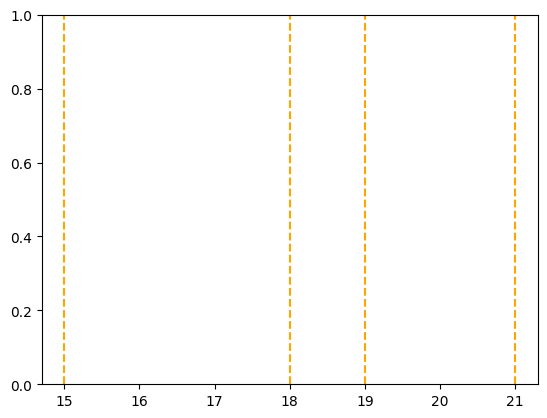

In [25]:
dn = sum(1 for pos, typ in mutations.items() if start <= pos <= end and typ in ["non-synonymous", "indel"])
ds = sum(1 for pos, typ in mutations.items() if start <= pos <= end and typ == "synonymous")
for region, (start, end) in functional_regions.items():
    indels_in_region = [pos for pos in mutations if start <= pos <= end and mutations[pos] == "indel"]
    print(f"Indels in {region}: {indels_in_region}")
for pos, typ in mutations.items():
    if typ == "indel":
        plt.axvline(pos, color="orange", linestyle="--", label="Indel")


indel_positions = [15, 18, 19, 21]
if any(pos % 3 != 0 for pos in indel_positions):
    print("Frame shift detected!")
else:
    print("No frame shift.")




In [27]:
from Bio import SeqIO

# Path to the 2023 gbff file
gbff_file = "ncbi_dataset_2023/ncbi_dataset/data/GCA_039338855.1/genomic.gbff"

functional_regions = {}
with open(gbff_file, "r") as handle:
    for record in SeqIO.parse(handle, "genbank"):
        for feature in record.features:
            if feature.type in ["region", "site"]:
                qualifiers = feature.qualifiers
                description = qualifiers.get("note", qualifiers.get("function", qualifiers.get("product", ["N/A"])))[0]
                start = int(feature.location.start)
                end = int(feature.location.end)
                functional_regions[description] = (start, end)

print("Functional Regions:", functional_regions)


Functional Regions: {}


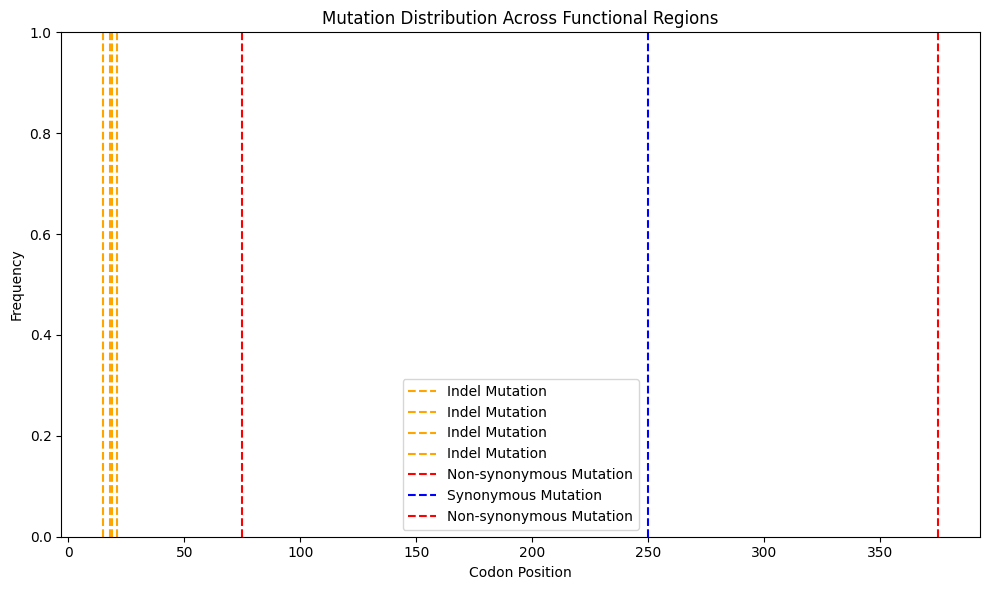

In [28]:

mutations = {
    15: "indel",
    18: "indel",
    19: "indel",
    21: "indel",
    75: "non-synonymous",
    250: "synonymous",
    375: "non-synonymous"
}


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
for region, (start, end) in functional_regions.items():
    plt.axvspan(start, end, color="gray", alpha=0.3, label=f"{region} ({start}-{end})")

#
for pos, typ in mutations.items():
    if typ == "non-synonymous":
        plt.axvline(pos, color="red", linestyle="--", label="Non-synonymous Mutation")
    elif typ == "synonymous":
        plt.axvline(pos, color="blue", linestyle="--", label="Synonymous Mutation")
    elif typ == "indel":
        plt.axvline(pos, color="orange", linestyle="--", label="Indel Mutation")

plt.xlabel("Codon Position")
plt.ylabel("Frequency")
plt.title("Mutation Distribution Across Functional Regions")
plt.legend()
plt.tight_layout()
plt.show()


dN/dS Ratios:
Catalytic Domain: 99999.99999999999
Binding Site: 0.0
Epitope Region: 99999.99999999999


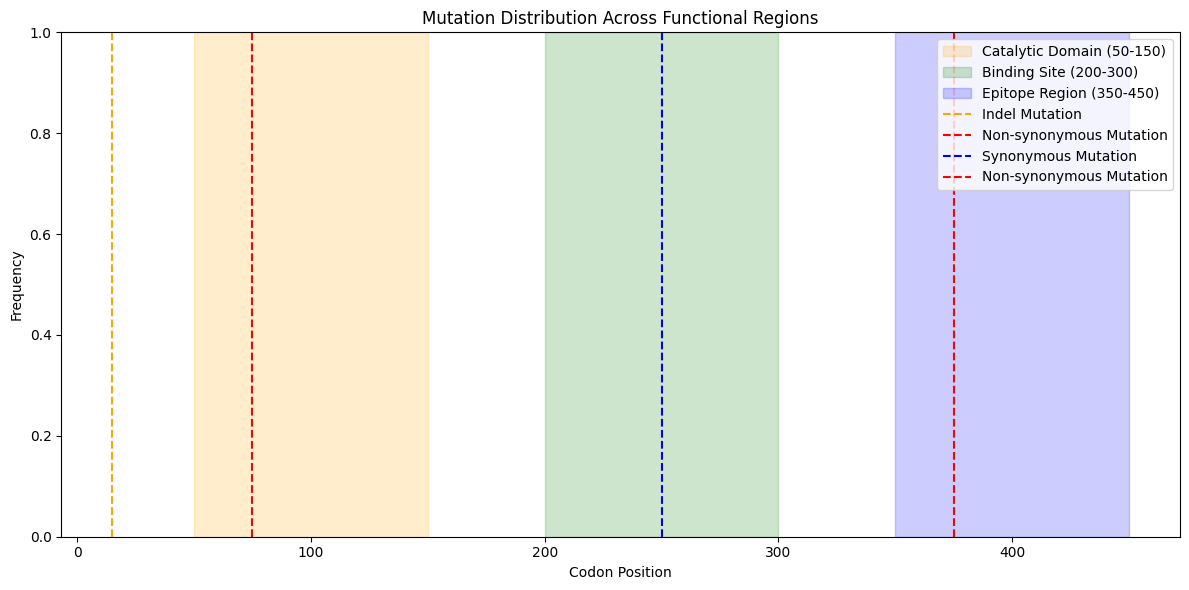

In [31]:
import matplotlib.pyplot as plt


mutations = {15: 'indel', 75: 'non-synonymous', 250: 'synonymous', 375: 'non-synonymous'}


functional_regions = {
    "Catalytic Domain": [50, 150],
    "Binding Site": [200, 300],
    "Epitope Region": [350, 450]
}


dn_ds_ratios = {}
for region, (start, end) in functional_regions.items():
    dn = sum(1 for pos, typ in mutations.items() if start <= pos <= end and typ == "non-synonymous")
    ds = sum(1 for pos, typ in mutations.items() if start <= pos <= end and typ == "synonymous")
    dn_ds_ratios[region] = dn / (ds + 1e-5)


print("dN/dS Ratios:")
for region, ratio in dn_ds_ratios.items():
    print(f"{region}: {ratio}")

plt.figure(figsize=(12, 6))

colors = {"Catalytic Domain": "orange", "Binding Site": "green", "Epitope Region": "blue"}
for region, (start, end) in functional_regions.items():
    plt.axvspan(start, end, color=colors[region], alpha=0.2, label=f"{region} ({start}-{end})")

for pos, typ in mutations.items():
    if typ == "indel":
        plt.axvline(pos, color="orange", linestyle="--", label="Indel Mutation")
    elif typ == "non-synonymous":
        plt.axvline(pos, color="red", linestyle="--", label="Non-synonymous Mutation")
    elif typ == "synonymous":
        plt.axvline(pos, color="blue", linestyle="--", label="Synonymous Mutation")

plt.xlabel("Codon Position")
plt.ylabel("Frequency")
plt.title("Mutation Distribution Across Functional Regions")
plt.legend()
plt.tight_layout()
plt.show()


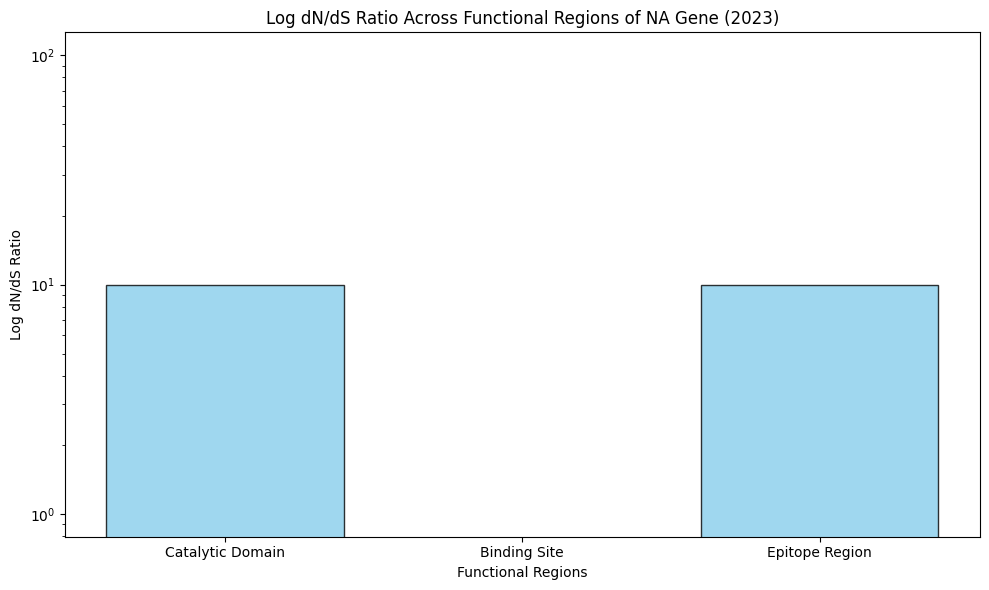

In [33]:
import matplotlib.pyplot as plt


functional_regions = {
    "Catalytic Domain": [50, 150],
    "Binding Site": [200, 300],
    "Epitope Region": [350, 450]
}


dn_ds_values_2023 = [99999.99999999999, 0.0, 99999.99999999999]

capped_dn_ds_values_2023 = [min(value, 10) if value != float('inf') else 10 for value in dn_ds_values_2023]


plt.figure(figsize=(10, 6))
plt.bar(functional_regions.keys(), capped_dn_ds_values_2023, color='skyblue', alpha=0.8, edgecolor='black')
plt.yscale('log')
plt.xlabel("Functional Regions")
plt.ylabel("Log dN/dS Ratio")
plt.title("Log dN/dS Ratio Across Functional Regions of NA Gene (2023)")
plt.tight_layout()
plt.show()
